# Cálculo de la duración de un proyecto usando el Método de Montecarlo

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib notebook

### Introducción de datos del proyecto

In [2]:
duration_distribution_parameters = pd.DataFrame(data={'A': [10, 1.5],
                                                      'B': [ 5, 0.4],
                                                      'C': [ 6, 0.8],
                                                      'D': [ 2, 0.7],
                                                      'E': [ 7, 1.8],
                                                      'F': [ 8, 0.8],
                                                      'G': [ 4, 1.4],
                                                      'H': [ 7, 1.6],
                                                      'f1':[ 0, 0.0],
                                                      'f2':[ 0, 0.0],
                                                     },
                                                index=['mean', 'stdev']  )
activity_names = duration_distribution_parameters.columns

In [3]:
duration_distribution_parameters

,A,B,C,D,E,F,G,H,f1,f2
mean,10.0,5.0,6.0,2.0,7.0,8.0,4.0,7.0,0.0,0.0
stdev,1.5,0.4,0.8,0.7,1.8,0.8,1.4,1.6,0.0,0.0


### Generación aleatoria de las duraciones de las actividades

In [4]:
number_of_samples = 1000

In [5]:

duration = pd.DataFrame([np.random.normal(size = number_of_samples,
                                          loc  = duration_distribution_parameters.loc['mean', task],
                                          scale= duration_distribution_parameters.loc['stdev',task])
                         for task in activity_names
                        ],
                        index=activity_names).T

In [6]:
duration.head()

,A,B,C,D,E,F,G,H,f1,f2
0,11.411563,4.396698,5.548384,2.651842,7.000725,7.721041,4.130383,11.325114,0.0,0.0
1,9.427823,5.723171,4.796637,1.848178,7.810765,7.322510,3.462433,3.778780,0.0,0.0
2,8.973804,4.684983,6.017570,1.783856,7.276997,7.188365,3.035002,5.686293,0.0,0.0
3,11.705293,4.054239,6.158902,1.377598,6.207925,6.930831,4.489077,10.544300,0.0,0.0
4,12.356586,5.295820,4.704622,1.541636,8.604703,8.361017,2.377251,6.193344,0.0,0.0


### Cálculo de los tiempos tempranos

In [7]:
t_early = pd.DataFrame()
t_early['nodo_0'] = np.zeros(number_of_samples)
t_early['nodo_1'] = t_early['nodo_0'] + duration['A'] 
t_early['nodo_2'] = t_early['nodo_0'] + duration['B']
t_early['nodo_3'] = pd.DataFrame( { 'input_D':  t_early['nodo_1'] + duration['D'] ,
                                    'input_f2': t_early['nodo_2'] + duration['f2']
                                  }).max(axis=1)
t_early['nodo_4'] = pd.DataFrame( { 'input_C':  t_early['nodo_1'] + duration['C'] ,
                                    'input_f1': t_early['nodo_3'] + duration['f1']
                                  }).max(axis=1)
t_early['nodo_5'] = pd.DataFrame( { 'input_E': t_early['nodo_4'] + duration['E'] ,
                                    'input_F': t_early['nodo_3'] + duration['F']
                                  }).max(axis=1)
t_early['nodo_6'] = pd.DataFrame( { 'input_G': t_early['nodo_5'] + duration['G'] ,
                                    'input_H': t_early['nodo_2'] + duration['H']
                                  }).max(axis=1)

In [8]:
t_early.head()

,nodo_0,nodo_1,nodo_2,nodo_3,nodo_4,nodo_5,nodo_6
0,0.0,11.411563,4.396698,14.063404,16.959946,23.960671,28.091055
1,0.0,9.427823,5.723171,11.276000,14.224460,22.035225,25.497658
2,0.0,8.973804,4.684983,10.757660,14.991375,22.268372,25.303374
3,0.0,11.705293,4.054239,13.082891,17.864195,24.072120,28.561197
4,0.0,12.356586,5.295820,13.898221,17.061208,25.665911,28.043162


### Visualización y caracterización de la distribución de la duración del proyecto 

<IPython.core.display.Javascript object>


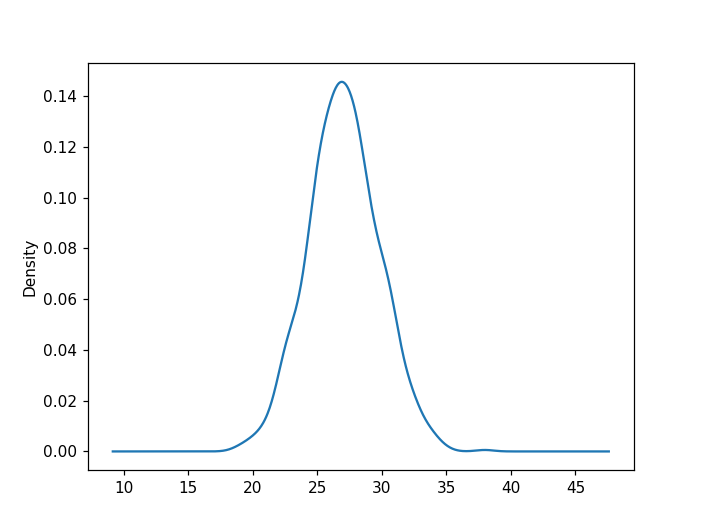

In [9]:
t_early['nodo_6'].plot(kind='density')

In [48]:
t_early['nodo_6'].describe()

count    1000.000000
mean       27.147364
std         2.762264
min        19.427750
25%        25.212858
50%        27.055699
75%        28.966053
max        36.628664
Name: nodo_6, dtype: float64